# PS2

### PS2_1.1 [5 points] 
Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.
每个国家的总死亡数，输出前十个国家和死亡数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Sig_Eqs=pd.read_csv('earthquakes-2021-10-27_15-16-30_+0800.tsv',sep='\t')
Sig_Eqs.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,Area,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,-2150,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,-1610,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,-1566,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
Sig_Eqs_CountryDeaths=Sig_Eqs.groupby(['Country'],as_index=False)['Deaths'].sum()
Sig_Eqs_CountryDeaths.sort_values('Deaths', ascending=False)[0:10]
# Sig_Eqs_CountryDeaths

,Country,Deaths
28,CHINA,2074900.0
140,TURKEY,1074569.0
65,IRAN,1011437.0
131,SYRIA,439224.0
69,ITALY,434863.0
58,HAITI,323472.0
10,AZERBAIJAN,317219.0
71,JAPAN,278138.0
6,ARMENIA,191890.0
102,PAKISTAN,148783.0


##Sig_Eqs_CountryDeaths=pd.DataFrame(Sig_Eqs_CountryDeaths)#转化成dataframe格式

##Sig_Eqs_CountryDeaths.reset_index().sort_values('Deaths', ascending=False)[0:10]

### PS2_1.2
1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?
每年世界>6级的数量

In [3]:
Sig_Eqs_Yearcount=Sig_Eqs[Sig_Eqs['Mag']>6].value_counts(['Year']).reset_index(name='Count')## without reset_index,its output is series
Sig_Eqs_Yearcount_sortvalues=Sig_Eqs_Yearcount.sort_values('Year',ascending=True)#排序
Sig_Eqs_Yearcount_sortvalues
# Sig_Eqs[Sig_Eqs['Mag']>6].groupby('Year').count()
# Sig_Eqs_Yearcount.columns=['Year','Count']#give the name

,Year,Count
298,-2150,1
461,-2000,1
383,-1250,1
382,-1050,1
381,-479,1
...,...,...
2,2017,32
8,2018,28
12,2019,27
72,2020,15


Text(0, 0.5, 'Count')

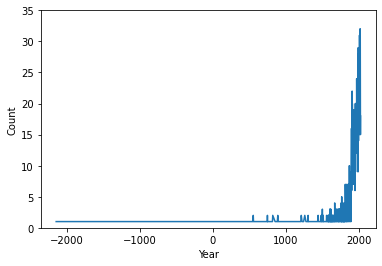

In [4]:
plt.plot(Sig_Eqs_Yearcount_sortvalues.Year,Sig_Eqs_Yearcount_sortvalues.Count)
plt.ylim(0,35)
plt.xlabel('Year')
plt.ylabel('Count')

Trend：Nearly one thousand year, Earthquakes are incresingly frequent.

There were fewer earthquakes in the earlier period because of, among other things, missing records

### PS2_1.3
1.3 [10 points] Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order

·每个国家的[地震总数] 
·每个国家最大地震的 [日期]
·降序

In [5]:
#the total number of earthquakes since 2150 B.C. in a given country
Sig_Eqs_CountryCount=Sig_Eqs.value_counts(['Country']).reset_index(name='Count')#
Sig_Eqs_CountryCount

,Country,Count
0,CHINA,610
1,JAPAN,409
2,INDONESIA,401
3,IRAN,380
4,TURKEY,330
...,...,...
151,NORWAY,1
152,SUDAN,1
153,SRI LANKA,1
154,PALAU,1


In [6]:

Sig_Eqs_CountryMagmax=Sig_Eqs.groupby(['Country'],as_index=False)['Mag'].max()#如何将cDate加回来？
Sig_Eqs_CountryMagmax

,Country,Mag
0,AFGHANISTAN,8.1
1,ALBANIA,7.5
2,ALGERIA,7.7
3,ANTARCTICA,8.1
4,ANTIGUA AND BARBUDA,8.0
...,...,...
151,VENEZUELA,8.2
152,VIETNAM,6.8
153,WALLIS AND FUTUNA (FRENCH TERRITORY),6.4
154,YEMEN,6.0


In [7]:

Sig_Eqs_CountryCount_CountryMagmax=Sig_Eqs_CountryCount.merge(Sig_Eqs_CountryMagmax,on='Country')
Sig_Eqs_CountryCount_CountryMagmax
#AttributeError: 'Series' object has no attribute 'merge'
#https://stackoverflow.com/questions/63533513/attributeerror-series-object-has-no-attribute-merge

,Country,Count,Mag
0,CHINA,610,8.5
1,JAPAN,409,9.1
2,INDONESIA,401,9.1
3,IRAN,380,7.9
4,TURKEY,330,7.8
...,...,...,...
151,NORWAY,1,5.8
152,SUDAN,1,5.5
153,SRI LANKA,1,NaN
154,PALAU,1,7.6


In [8]:
#Year	Mo	Dy	Hr	Mn	Sec
Sig_Eqs['cYear']= Sig_Eqs['Year'].astype(str)
Sig_Eqs['cMonth']= Sig_Eqs['Mo'].astype(str)
Sig_Eqs['cDay']= Sig_Eqs['Dy'].astype(str)
Sig_Eqs['cDate'] = Sig_Eqs['cYear'] + '-' + Sig_Eqs['cMonth'] + '-' + Sig_Eqs['cDay']

Sig_Eqs_cDate=Sig_Eqs[['cDate','Country','Mag']]
Sig_Eqs_cDate


,cDate,Country,Mag
0,-2150-nan-nan,JORDAN,7.3
1,-2000-nan-nan,SYRIA,NaN
2,-2000-nan-nan,TURKMENISTAN,7.1
3,-1610-nan-nan,GREECE,NaN
4,-1566-nan-nan,ISRAEL,NaN
...,...,...,...
6267,2021-9.0-21.0,AUSTRALIA,5.9
6268,2021-9.0-27.0,GREECE,6.0
6269,2021-10.0-6.0,PAKISTAN,5.9
6270,2021-10.0-12.0,NaN,6.4


In [9]:
Sig_Eqs_CountryCount_CountryMagmax_cDate=Sig_Eqs_CountryCount_CountryMagmax.merge(Sig_Eqs_cDate,
                                                                                  on=['Country','Mag'])
Sig_Eqs_CountryCount_CountryMagmax_cDate

,Country,Count,Mag,cDate
0,CHINA,610,8.5,1668-7.0-25.0
1,JAPAN,409,9.1,2011-3.0-11.0
2,INDONESIA,401,9.1,2004-12.0-26.0
3,IRAN,380,7.9,856-12.0-22.0
4,TURKEY,330,7.8,1916-1.0-24.0
...,...,...,...,...
173,NORWAY,1,5.8,1819-8.0-31.0
174,SUDAN,1,5.5,1993-8.0-1.0
175,SRI LANKA,1,NaN,1882-1.0-nan
176,PALAU,1,7.6,1914-10.0-23.0


In [10]:
###整合到def
Sig_Eqs=pd.read_csv('earthquakes-2021-10-27_15-16-30_+0800.tsv',sep='\t')

def CountEq_LargestEq():
    #(1)the total number of earthquakes since 2150 B.C. in a given country
    Sig_Eqs_CountryCount=Sig_Eqs.value_counts(['Country']).reset_index(name='Count')
    #(2) the date of the largest earthquake ever happened in this country
    Sig_Eqs_CountryMagmax=Sig_Eqs.groupby(['Country'],as_index=False)['Mag'].max()
    Sig_Eqs_CountryCount_CountryMagmax=Sig_Eqs_CountryCount.merge(Sig_Eqs_CountryMagmax,on='Country')
    #Year	Mo	Dy	Hr	Mn	Sec
    Sig_Eqs['cYear']= Sig_Eqs['Year'].astype(str)
    Sig_Eqs['cMonth']= Sig_Eqs['Mo'].astype(str)
    Sig_Eqs['cDay']= Sig_Eqs['Dy'].astype(str)
    Sig_Eqs['cDate'] = Sig_Eqs['cYear'] + '-' + Sig_Eqs['cMonth'] + '-' + Sig_Eqs['cDay']
    Sig_Eqs_cDate=Sig_Eqs[['cDate','Country','Mag']]
    Sig_Eqs_CountryCount_CountryMagmax_cDate=Sig_Eqs_CountryCount_CountryMagmax.merge(Sig_Eqs_cDate,
                                                                                  on=['Country','Mag'])
    print(Sig_Eqs_CountryCount_CountryMagmax_cDate)

#     return None

CountEq_LargestEq()

       Country  Count  Mag           cDate
0        CHINA    610  8.5   1668-7.0-25.0
1        JAPAN    409  9.1   2011-3.0-11.0
2    INDONESIA    401  9.1  2004-12.0-26.0
3         IRAN    380  7.9   856-12.0-22.0
4       TURKEY    330  7.8   1916-1.0-24.0
..         ...    ...  ...             ...
173     NORWAY      1  5.8   1819-8.0-31.0
174      SUDAN      1  5.5    1993-8.0-1.0
175  SRI LANKA      1  NaN    1882-1.0-nan
176      PALAU      1  7.6  1914-10.0-23.0
177     ZAMBIA      1  5.9   2017-2.0-24.0

[178 rows x 4 columns]


### PS2_2
Explain how you filter the data in your report.
#过滤数据

[10 points] Plot monthly averaged wind speed as a function of the observation time. Is there a trend in monthly averaged wind speed within the past 10 years?
#风速月平均

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('2281305.csv')
data.head()

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"


#data['Date_str']=data['DATE'].astype("str")

#data['Year_Month']=data['Date_str'].str.slice(0,7)   #Equivalent behaviour to:           str[0:7]


<AxesSubplot:xlabel='Year_Month'>

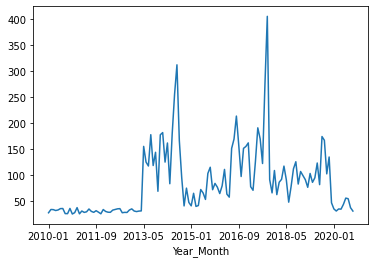

In [12]:

#select year and month to string type
data['Year_Month']=data['DATE'].astype('str').str[0:7]
# data['Year_Month']
#select wind speed  to float type
data['WindSpeed']=data['WND'].str[8:12].astype('float')
# data['WindSpeed']
data.groupby(['Year_Month'])['WindSpeed'].mean().plot()

in monthly averaged wind speed, within the past 10 years, it is very fluctuate

### PS2_3

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
dataGL=pd.read_csv('GLW00016504.csv')
dataGL.shape

(784, 62)

###  PS2_3.1 clean possible data points with missing values or bad quality.

In [14]:
#delete the missing row if TAVG is missed  
dataGL['Temperature']=dataGL['TAVG'].dropna()## https://www.runoob.com/pandas/pandas-cleaning.html
dataGL.shape
dataGL

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,Temperature
0,GLW00016504,1949/1/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,NaN,NaN,...,"8,X",-18.11,"4,,,X",-29.38,"4,,,X",NaN,NaN,NaN,NaN,-23.74
1,GLW00016504,1949/2/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,",X",...,",X",-25.97,",,,X",-33.22,",,,X",NaN,NaN,NaN,NaN,-29.59
2,GLW00016504,1949/3/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,"4,X",...,"4,X",-11.97,"2,,,X",-23.26,"2,,,X",NaN,NaN,NaN,NaN,-17.62
3,GLW00016504,1949/4/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,",X",...,",X",-10.26,",,,X",-19.24,",,,X",NaN,NaN,NaN,NaN,-14.75
4,GLW00016504,1949/5/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,",X",...,",X",5.77,",,,X",-4.96,",,,X",NaN,NaN,NaN,NaN,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,GLW00016504,2020/8/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",E",14.48,",,,E",4.08,",,,E",NaN,NaN,NaN,NaN,9.28
780,GLW00016504,2020/9/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",E",5.55,",,,E",-1.57,",,,E",NaN,NaN,NaN,NaN,1.99
781,GLW00016504,2020/10/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",E",1.79,",,,E",-5.04,",,,E",NaN,NaN,NaN,NaN,-1.62
782,GLW00016504,2020/11/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",E",-4.43,",,,E",-13.03,",,,E",NaN,NaN,NaN,NaN,-8.73


###  PS2_3.2  Plot the time series of a certain variable.

In [15]:

#create new columns: Year and Month
dataGL['Year'] =pd.to_datetime(dataGL['DATE']).dt.year
dataGL['Month'] = pd.to_datetime(dataGL['DATE']).dt.month
dataGL

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,Temperature,Year,Month
0,GLW00016504,1949/1/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,NaN,NaN,...,"4,,,X",-29.38,"4,,,X",NaN,NaN,NaN,NaN,-23.74,1949,1
1,GLW00016504,1949/2/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,",X",...,",,,X",-33.22,",,,X",NaN,NaN,NaN,NaN,-29.59,1949,2
2,GLW00016504,1949/3/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,"4,X",...,"2,,,X",-23.26,"2,,,X",NaN,NaN,NaN,NaN,-17.62,1949,3
3,GLW00016504,1949/4/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,",X",...,",,,X",-19.24,",,,X",NaN,NaN,NaN,NaN,-14.75,1949,4
4,GLW00016504,1949/5/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",NaN,NaN,0.0,",X",...,",,,X",-4.96,",,,X",NaN,NaN,NaN,NaN,0.41,1949,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,GLW00016504,2020/8/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",,,E",4.08,",,,E",NaN,NaN,NaN,NaN,9.28,2020,8
780,GLW00016504,2020/9/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",,,E",-1.57,",,,E",NaN,NaN,NaN,NaN,1.99,2020,9
781,GLW00016504,2020/10/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",,,E",-5.04,",,,E",NaN,NaN,NaN,NaN,-1.62,2020,10
782,GLW00016504,2020/11/1,67.01667,-50.8,50.3,"SONDRESTROM, GL",0.0,E,0.0,",E",...,",,,E",-13.03,",,,E",NaN,NaN,NaN,NaN,-8.73,2020,11


<AxesSubplot:xlabel='Month'>

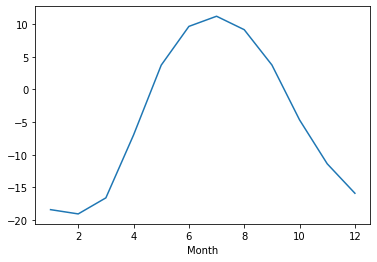

In [16]:
dataGL.groupby(['Month'])['Temperature'].mean().plot()#历年月平均

###  PS2_3.3  Conduct at least 5 simple statistical checks with the variable, and report your findings.

In [17]:

print(dataGL['Temperature'].describe())
print('')
print('mean:',dataGL['Temperature'].mean())
print('max:',dataGL['Temperature'].max())
print('min:',dataGL['Temperature'].min())
print('med:',dataGL['Temperature'].median())
print('std:',dataGL['Temperature'].std())

count    775.000000
mean      -4.533703
std       11.710298
min      -36.660000
25%      -14.525000
50%       -5.280000
75%        7.140000
max       12.890000
Name: Temperature, dtype: float64

mean: -4.533703225806448
max: 12.89
min: -36.66
med: -5.28
std: 11.710298492795323
